In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_percentage_error,mean_absolute_error
import pickle

In [2]:
df=pd.read_csv("cardheko_encoded.csv")
df

,km,Engine Displacement,Max Power,No of Cylinder,Mileage,price (lakh),Insurance_Encoded,modelyear_Encoded,owner_Encoded,cylinder_Encoded,...,color_Encoded,seats_Encoded,streeingtype_Encoded,drivetype_Encoded,ft_Encoded,transmission_Encoded,Length,Width,Wheel Base,Cargo Volumn
0,20000,998,118.36,3.0,17.00,11.50,1.0,27.0,4.0,2,...,8,3,1,6,4,0,3995,1790,2500,392
1,20687,1196,73.00,4.0,15.37,4.15,2.0,20.0,4.0,3,...,50,5,3,8,4,1,3675,1475,2350,540
2,30000,999,98.63,3.0,20.00,7.50,1.0,26.0,4.0,2,...,78,3,1,6,4,1,3994,1758,2500,336
3,59247,1086,68.05,4.0,19.81,3.98,2.0,20.0,4.0,3,...,102,3,4,6,4,1,3585,1595,2380,225
4,50000,1199,88.70,4.0,18.70,5.50,1.0,20.0,4.0,3,...,78,3,4,6,4,1,3955,1694,2530,354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,60000,2179,140.00,4.0,15.10,7.00,1.0,18.0,4.0,3,...,78,5,4,6,1,1,4585,1890,2700,418
8365,50000,2993,270.90,6.0,14.74,20.00,1.0,19.0,4.0,5,...,9,3,4,8,1,0,4961,1877,2909,540
8366,120000,1995,187.74,4.0,20.37,35.00,1.0,23.0,2.0,3,...,9,3,4,8,1,0,4936,2126,2975,520
8367,50000,1497,108.50,4.0,21.50,8.50,1.0,24.0,3.0,3,...,78,3,4,6,1,0,3994,1811,2498,350


In [3]:
df.columns

Index(['km', 'Engine Displacement', 'Max Power', 'No of Cylinder', 'Mileage',
       'price (lakh)', 'Insurance_Encoded', 'modelyear_Encoded',
       'owner_Encoded', 'cylinder_Encoded', 'oem_Encoded', 'bt_Encoded',
       'model_Encoded', 'variantName_Encoded', 'engine_Encoded',
       'city_Encoded', 'color_Encoded', 'seats_Encoded',
       'streeingtype_Encoded', 'drivetype_Encoded', 'ft_Encoded',
       'transmission_Encoded', 'Length', 'Width', 'Wheel Base',
       'Cargo Volumn'],
      dtype='object')

In [3]:
df.drop(["Engine Displacement",'No of Cylinder','model_Encoded','variantName_Encoded','engine_Encoded','streeingtype_Encoded', 'drivetype_Encoded','Length', 'Width',
       'Cargo Volumn'],axis=1,inplace=True)

In [4]:
df.drop_duplicates(inplace=True)

In [5]:
df=df.reset_index(drop=True, inplace=False)

In [10]:
df.columns

Index(['km', 'Max Power', 'Mileage', 'price (lakh)', 'Insurance Validity',
       'modelYear', 'owner', 'No of Cylinder', 'oem', 'bt', 'city', 'Color',
       'Seats', 'ft', 'transmission', 'Wheel Base'],
      dtype='object')

In [9]:
df.columns = ['km', 'Max Power', 'Mileage','price (lakh)', 'Insurance Validity', 'modelYear', 'owner', 
              'No of Cylinder', 'oem', 'bt', 'city', 'Color', 'Seats', 'ft', 'transmission', 'Wheel Base']

In [32]:
df.describe()

,km,Max Power,Mileage,price (lakh),Insurance_Encoded,modelyear_Encoded,owner_Encoded,cylinder_Encoded,oem_Encoded,bt_Encoded,city_Encoded,color_Encoded,seats_Encoded,ft_Encoded,transmission_Encoded,Wheel Base
count,8149.000000,8149.000000,8149.000000,8149.000000,8149.000000,8149.000000,8149.000000,8149.000000,8149.000000,8149.000000,8149.000000,8149.000000,8149.000000,8149.000000,8149.000000,8149.000000
mean,57791.905633,102.971674,19.212960,8.869674,1.422874,21.509388,3.642656,2.772365,16.168610,4.967603,2.412689,78.458952,3.199043,2.993619,0.729292,2542.144435
std,33789.806671,40.214830,3.516438,9.774828,0.609890,3.874291,0.636731,0.525811,8.530392,2.705234,1.706392,35.958476,0.646082,1.426813,0.444353,146.379422
min,0.000000,35.000000,8.000000,0.201610,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2010.000000
25%,30300.000000,78.900000,17.000000,3.990000,1.000000,19.000000,3.000000,3.000000,9.000000,2.000000,1.000000,51.000000,3.000000,1.000000,0.000000,2425.000000
50%,54000.000000,88.500000,18.900000,6.000000,1.000000,22.000000,4.000000,3.000000,17.000000,7.000000,2.000000,78.000000,3.000000,4.000000,1.000000,2519.000000
75%,80000.000000,118.350000,21.400000,9.390000,2.000000,24.000000,4.000000,3.000000,20.000000,8.000000,4.000000,102.000000,3.000000,4.000000,1.000000,2610.000000
max,201161.000000,265.000000,32.520000,119.000000,3.000000,28.000000,5.000000,6.000000,32.000000,9.000000,5.000000,124.000000,7.000000,4.000000,1.000000,3150.000000


### outliers removing

In [6]:
for i in df[['km','Max Power','Mileage','Wheel Base']]:
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[i].quantile(0.15)
    Q3 = df[i].quantile(0.85)

    # Calculate the IQR
    IQR = Q3 - Q1

    # Define the lower and upper bounds for the outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out rows that fall outside of the IQR bounds
    df = df[(df[i] >= lower_bound) & (df[i] <= upper_bound)]

In [7]:
df=df.reset_index(drop=True, inplace=False)
df

,km,Max Power,Mileage,price (lakh),Insurance_Encoded,modelyear_Encoded,owner_Encoded,cylinder_Encoded,oem_Encoded,bt_Encoded,city_Encoded,color_Encoded,seats_Encoded,ft_Encoded,transmission_Encoded,Wheel Base
0,20000,118.36,17.00,11.50,1.0,27.0,4.0,2,13,7,1,8,3,4,0,2500
1,20687,73.00,15.37,4.15,2.0,20.0,4.0,3,20,5,1,50,5,4,1,2350
2,30000,98.63,20.00,7.50,1.0,26.0,4.0,2,24,7,1,78,3,4,1,2500
3,59247,68.05,19.81,3.98,2.0,20.0,4.0,3,9,2,1,102,3,4,1,2380
4,50000,88.70,18.70,5.50,1.0,20.0,4.0,3,8,2,1,78,3,4,1,2530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8144,20000,187.70,16.55,55.00,1.0,23.0,4.0,3,1,7,3,78,3,1,0,2864
8145,60000,140.00,15.10,7.00,1.0,18.0,4.0,3,17,7,3,78,5,1,1,2700
8146,120000,187.74,20.37,35.00,1.0,23.0,2.0,3,1,8,3,9,3,1,0,2975
8147,50000,108.50,21.50,8.50,1.0,24.0,3.0,3,29,7,3,78,3,1,0,2498


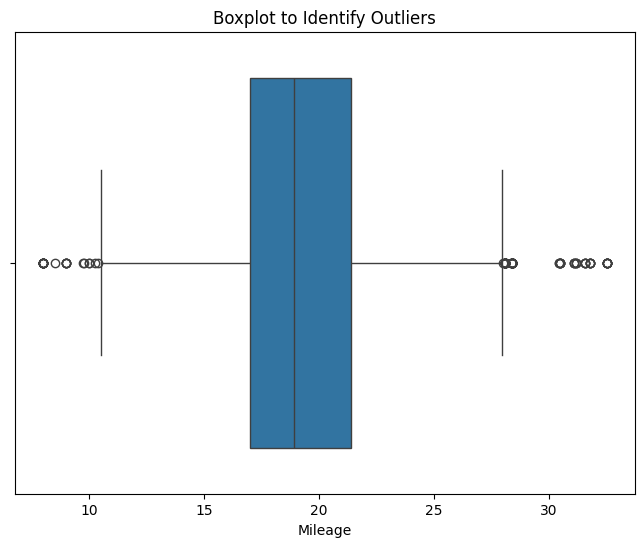

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.boxplot(x=df["Mileage"])
plt.title("Boxplot to Identify Outliers")
plt.show()



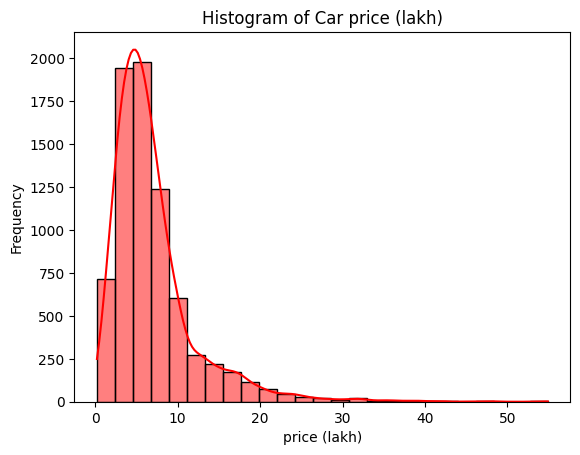

In [16]:
sns.histplot(df['price (lakh)'], bins=25, kde=True, color='red', edgecolor='black')
plt.xlabel('price (lakh)')
plt.ylabel('Frequency')
plt.title('Histogram of Car price (lakh)')
plt.show()

Text(0.5, 1.0, 'Mileage vs price')

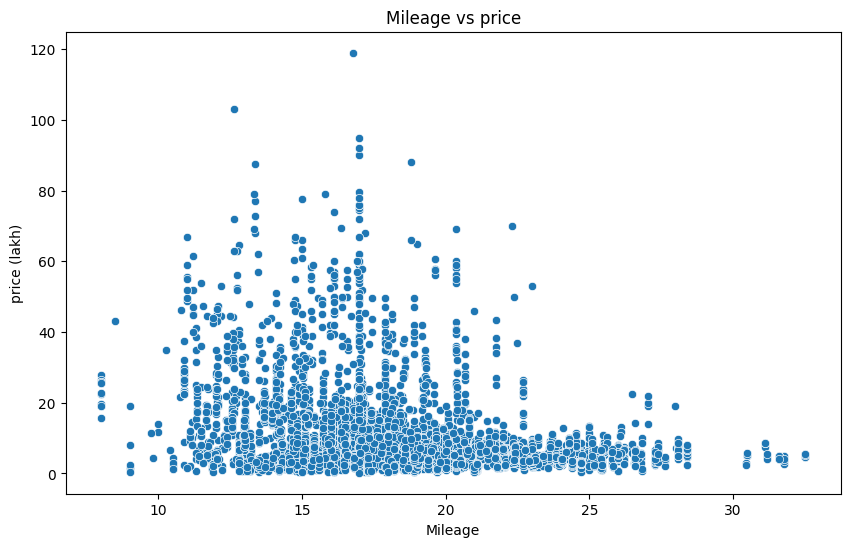

In [10]:
fig= plt.figure(figsize=(10,6))
sns.scatterplot(x='Mileage', y='price (lakh)', data=df)
plt.title('Mileage vs price')

In [6]:
# Calculate the IQR
Q1 = df["km"].quantile(0.15)
Q3 = df["km"].quantile(0.85)
IQR = Q3 - Q1

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower bound: {lower_bound}, Upper bound: {upper_bound}")

# Remove outliers
df_no_outliers = df[(df["km"] >= lower_bound) & (df["km"] <= upper_bound)]

# Plot the boxplot again after removing outliers
plt.figure(figsize=(8,6))
sns.boxplot(x=df_no_outliers["km"])
plt.title("Boxplot After Removing Outliers")
plt.show()

Lower bound: -90423.77500000001, Upper bound: 204039.625


NameError: name 'plt' is not defined

# all models and its scores

### Using Cross Validation method

In [8]:
X=df.drop(['price (lakh)'],axis=1)
y=df['price (lakh)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting Regressor":GradientBoostingRegressor(random_state=42),
    #"Support Vector Regression": SVR(kernel='linear'),
    #"KNeighbors Regressor": KNeighborsRegressor()
}


In [13]:
cv = KFold(n_splits=10, shuffle=True, random_state=42)

cv_results = {}
for model_name, model in models.items():
    # Perform cross-validation with negative MSE because cross_val_score expects a "higher is better" metric
    mse_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='neg_mean_squared_error')
    cv_results[model_name] = mse_scores
    print(f'{model_name} Cross-Validation Results: Mean MSE = {-mse_scores.mean():.4f}, Std Dev = {-mse_scores.std():.4f}')


Linear Regression Cross-Validation Results: Mean MSE = 28.4670, Std Dev = -4.9868
Decision Tree Regressor Cross-Validation Results: Mean MSE = 13.3378, Std Dev = -4.7943
Random Forest Cross-Validation Results: Mean MSE = 7.2499, Std Dev = -4.7392
Gradient Boosting Regressor Cross-Validation Results: Mean MSE = 8.2221, Std Dev = -3.0097


In [14]:
for model_name, model in models.items():
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate performance metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae= mean_absolute_error(y_test, y_pred)
    mape=mean_absolute_percentage_error(y_test, y_pred)
    
    print(f'{model_name} Test Set Performance:')
    print(f'  Mean Squared Error (MSE): {mse:.4f}')
    print(f'  Mean Absolute Error: {mae:.4f}')
    print(f'  Mean Absolute Percentile Error: {mape:.4f}')
    print(f'  R² Score: {r2:.4f}\n')


Linear Regression Test Set Performance:
  Mean Squared Error (MSE): 23.1907
  Mean Absolute Error: 3.0478
  Mean Absolute Percentile Error: 0.6250
  R² Score: 0.7187

Decision Tree Regressor Test Set Performance:
  Mean Squared Error (MSE): 8.8973
  Mean Absolute Error: 1.4784
  Mean Absolute Percentile Error: 0.2008
  R² Score: 0.8921

Random Forest Test Set Performance:
  Mean Squared Error (MSE): 5.3699
  Mean Absolute Error: 1.0683
  Mean Absolute Percentile Error: 0.1466
  R² Score: 0.9349

Gradient Boosting Regressor Test Set Performance:
  Mean Squared Error (MSE): 6.0488
  Mean Absolute Error: 1.2950
  Mean Absolute Percentile Error: 0.1872
  R² Score: 0.9266



In [8]:
feature_importance = model.feature_importances_

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({'Feature': ['km', 'Max Power', 'Mileage', 'Insurance_Encoded',
       'modelyear_Encoded', 'owner_Encoded', 'cylinder_Encoded', 'oem_Encoded',
       'bt_Encoded', 'city_Encoded', 'color_Encoded', 'seats_Encoded',
       'ft_Encoded', 'transmission_Encoded'], 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

NameError: name 'model' is not defined

# ML models building

In [18]:
corr_matrix=df.corr()
corr_with_target = corr_matrix['price (lakh)'].sort_values(ascending=False)
print(corr_with_target)

price (lakh)            1.000000
Max Power               0.719966
Wheel Base              0.620872
modelyear_Encoded       0.516420
bt_Encoded              0.387200
seats_Encoded           0.225545
owner_Encoded           0.219471
cylinder_Encoded        0.193003
Insurance_Encoded       0.088222
oem_Encoded             0.027421
color_Encoded          -0.034213
city_Encoded           -0.111416
ft_Encoded             -0.262861
km                     -0.279109
Mileage                -0.336999
transmission_Encoded   -0.421477
Name: price (lakh), dtype: float64


### Train Test Split

In [9]:
value=df.drop(['price (lakh)'],axis=1)
tar=df['price (lakh)']
train_data, test_data, train_lab, test_lab = train_test_split(value, tar, test_size= 0.20, random_state= 42)

### Linear Regression

In [10]:
model = LinearRegression()

In [11]:
cv = KFold(n_splits=10, shuffle=True, random_state=42)
mse_scores = cross_val_score(model, train_data, train_lab, cv=cv, scoring='neg_mean_squared_error')
print(f'Linear Regression Cross-Validation Results: Mean MSE = {-mse_scores.mean():.4f}')

Linear Regression Cross-Validation Results: Mean MSE = 28.4670


In [12]:
model.fit(train_data,train_lab)

# Testing performance
pred_value = model.predict(test_data)
print(pred_value,f"\n")

print('Mean Squared Error: ',mean_squared_error(test_lab, pred_value))
print("Mean Absolute Error: ",mean_absolute_error(test_lab, pred_value))
print("Mean Absolute Precentage Error: ",mean_absolute_percentage_error(test_lab, pred_value))
print("R2 Score",r2_score(test_lab, pred_value))

[27.30514802  2.74825336 12.00644937 ...  2.60242436 20.02847847
  6.55909253] 

Mean Squared Error:  23.190704000800352
Mean Absolute Error:  3.047833367871028
Mean Absolute Precentage Error:  0.6249840044629854
R2 Score 0.718685131872334


In [15]:
# Training Performance
pred_train = model.predict(train_data)
print(pred_train,f"\n")

print('Mean Squared Error: ',mean_squared_error(train_lab, pred_train))
print("Mean Absolute Error: ",mean_absolute_error(test_lab, pred_value))
print("Mean Absolute Precentage Error: ",mean_absolute_percentage_error(train_lab, pred_train))
print("R2 Score",r2_score(train_lab, pred_train))

[10.11564576  5.28976317 11.5100224  ...  5.91315831  2.11551265
 20.82035207] 

Mean Squared Error:  73.92331578651658
Mean Absolute Error:  4.423907751400313
Mean Absolute Precentage Error:  0.8221694426648422
R2 Score 0.6251022263852403


### Random forest regressor

In [14]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=100, random_state=42)

In [13]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=200, random_state=42, max_depth= None)

In [15]:
cv = KFold(n_splits=10, shuffle=True, random_state=42)
mse_scores = cross_val_score(model, train_data, train_lab, cv=cv, scoring='neg_mean_squared_error')
print(f'Random Forest Regressor Cross-Validation Results: Mean MSE = {-mse_scores.mean():.4f}')

Random Forest Regressor Cross-Validation Results: Mean MSE = 7.2499


In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Create a RandomForest model
model = RandomForestRegressor()

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the model with the best parameters
grid_search.fit(train_data, train_lab)

# Print the best parameters and best score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Fitting 3 folds for each of 81 candidates, totalling 243 fits


KeyboardInterrupt: 

In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define the model
model = RandomForestRegressor()

# Define hyperparameters and their possible values
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [10, 20, None]        # Max depth of the tree
}

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)

# Fit the model and search for the best parameters
grid_search.fit(train_data, train_lab)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)


Best Hyperparameters: {'max_depth': None, 'n_estimators': 200}


In [17]:
model.fit(train_data,train_lab)

# Testing performance
pred_value = model.predict(test_data)
print(pred_value,f'\n')

print('Mean Squared Error: ',mean_squared_error(test_lab, pred_value))
print("Mean Absolute Error: ",mean_absolute_error(test_lab, pred_value))
print("Mean Absolute Precentage Error: ",mean_absolute_percentage_error(test_lab, pred_value))
print("R2 Score",r2_score(test_lab, pred_value))

[26.8385      4.924       8.8454     ...  3.15481667 18.
  3.246752  ] 

Mean Squared Error:  5.120263393980845
Mean Absolute Error:  1.0647030826662773
Mean Absolute Precentage Error:  0.1467773321305869
R2 Score 0.9378886375589579


In [28]:
# Training Performance
pred_train = model.predict(train_data)
print(pred_train,f'\n')

print('Mean Squared Error: ',mean_squared_error(train_lab, pred_train))
print("Mean Absolute Error: ",mean_absolute_error(test_lab, pred_value))
print("Mean Absolute Precentage Error: ",mean_absolute_percentage_error(train_lab, pred_train))
print("R2 Score: ",r2_score(train_lab, pred_train))

[3.8698     1.57598485 3.4831     ... 5.3031     6.5935     4.89425   ] 

Mean Squared Error:  0.9570172960261618
Mean Absolute Error:  1.0700088679262831
Mean Absolute Precentage Error:  0.05511432493740639
R2 Score:  0.9903135756888073


In [18]:
with open('randomforest_model.pkl', 'wb') as file:
    pickle.dump(model, file)

### Decision tree regressor

In [18]:
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor(random_state=42)

In [19]:
cv = KFold(n_splits=10, shuffle=True, random_state=42)
mse_scores = cross_val_score(model, train_data, train_lab, cv=cv, scoring='neg_mean_squared_error')
print(f'Decision Tree Regressor Cross-Validation Results: Mean MSE = {-mse_scores.mean():.4f}')

Decision Tree Regressor Cross-Validation Results: Mean MSE = 13.3378


In [20]:
model.fit(train_data,train_lab)

# Testing performance
pred_value = model.predict(test_data)
print(pred_value,f'\n')

print('Mean Squared Error: ',mean_squared_error(test_lab, pred_value))
print("Mean Absolute Error: ",mean_absolute_error(test_lab, pred_value))
print("Mean Absolute Precentage Error: ",mean_absolute_percentage_error(test_lab, pred_value))
print("R2 Score: ",r2_score(test_lab, pred_value))

[15.49  5.25  6.   ...  3.11 16.75  3.5 ] 

Mean Squared Error:  8.897339949666934
Mean Absolute Error:  1.4784085582822086
Mean Absolute Precentage Error:  0.2008354269089165
R2 Score:  0.8920708049854292


In [26]:
# Training Performance
pred_train = model.predict(train_data)
print(pred_train,f'\n')

print('Mean Squared Error: ',mean_squared_error(train_lab, pred_train))
print("Mean Absolute Error: ",mean_absolute_error(test_lab, pred_value))
print("Mean Absolute Precentage Error: ",mean_absolute_percentage_error(train_lab, pred_train))
print("R2 Score",r2_score(train_lab, pred_train))

[ 9.    6.05  9.25 ...  7.95  7.11 10.15] 

Mean Squared Error:  0.013981134311797047
Mean Absolute Error:  2.052534555353902
Mean Absolute Precentage Error:  0.0006502910860777476
R2 Score 0.9999290954948337


### Gradient boosting regressor

In [21]:
from sklearn.ensemble import GradientBoostingRegressor
model=GradientBoostingRegressor(n_estimators=100,random_state=42)

In [22]:
cv = KFold(n_splits=10, shuffle=True, random_state=42)
mse_scores = cross_val_score(model, train_data, train_lab, cv=cv, scoring='neg_mean_squared_error')
print(f'Gradient Boosting Regressor Cross-Validation Results: Mean MSE = {-mse_scores.mean():.4f}')

Gradient Boosting Regressor Cross-Validation Results: Mean MSE = 8.2221


In [23]:
model.fit(train_data,train_lab)

# Testing performance
pred_value = model.predict(test_data)
print(pred_value,f'\n')

print('Mean Squared Error: ',mean_squared_error(test_lab, pred_value))
print("Mean Absolute Error: ",mean_absolute_error(test_lab, pred_value))
print("Mean Absolute Precentage Error: ",mean_absolute_percentage_error(test_lab, pred_value))
print("R2 Score",r2_score(test_lab, pred_value))

[26.33665285  4.71752468  9.21768755 ...  3.06537541 21.36555667
  5.09748236] 

Mean Squared Error:  6.048806772200883
Mean Absolute Error:  1.2950243855931727
Mean Absolute Precentage Error:  0.18722971089733936
R2 Score 0.9266249407783094


In [30]:
# Training Performance
pred_train = model.predict(train_data)
print(pred_train,f'\n')

print('Mean Squared Error: ',mean_squared_error(train_lab, pred_train))
print("Mean Absolute Error: ",mean_absolute_error(test_lab, pred_value))
print("Mean Absolute Precentage Error: ",mean_absolute_percentage_error(train_lab, pred_train))
print("R2 Score",r2_score(train_lab, pred_train))

[ 8.69497126  5.96133851  8.35980442 ...  6.99124982  7.28144356
 10.81155957] 

Mean Squared Error:  6.849721143567494
Mean Absolute Error:  1.876505401200873
Mean Absolute Precentage Error:  0.19630897056309846
R2 Score 0.9652620397328852


In [ ]:
import xgboost as xgb

# Testing the model

In [31]:
with open('randomforest_model.pkl', 'rb') as file:
    model = pickle.load(file)

In [33]:
test_data.index[test_lab> 7]

Index([2651, 8147, 3817,  263, 1593, 3080, 5711, 7173, 1559, 5146,
       ...
       3518, 3892, 3753, 2094, 2252,  418, 6836, 6831, 7972,  293],
      dtype='int64', length=665)

In [34]:
a=[2651, 8147, 3817,  263, 1593, 3080]
df.iloc[a].drop('price (lakh)', axis = 1)

,km,Max Power,Mileage,Insurance Validity,modelYear,owner,No of Cylinder,oem,bt,city,Color,Seats,ft,transmission,Wheel Base
2651,30000,187.74,18.25,2.0,21.0,3.0,3,0,8,0,119,3,1,0,2820
8147,50000,108.50,21.50,1.0,24.0,3.0,3,29,7,3,78,3,1,0,2498
3817,38506,126.20,22.00,1.0,24.0,4.0,3,9,8,5,50,3,1,0,2600
263,35000,194.00,17.00,2.0,26.0,4.0,3,21,7,1,9,3,1,0,2873
1593,46602,88.70,17.50,2.0,23.0,4.0,3,8,7,0,14,3,4,1,2555
3080,138726,168.50,13.00,2.0,19.0,4.0,3,30,7,5,50,5,1,1,2750


In [35]:
print(df.loc[a,"price (lakh)"])

2651    21.00
8147     8.50
3817     9.00
263     62.00
1593     8.65
3080    13.00
Name: price (lakh), dtype: float64


In [36]:
predicted=model.predict(df.loc[a].drop('price (lakh)', axis = 1))
for i in predicted:
    print(f"{i:.2f}")

25.89
8.82
9.93
55.83
7.96
14.58


In [ ]:
test_lab.loc[test_lab>=200]

Text(0.5, 1.0, 'km vs price')

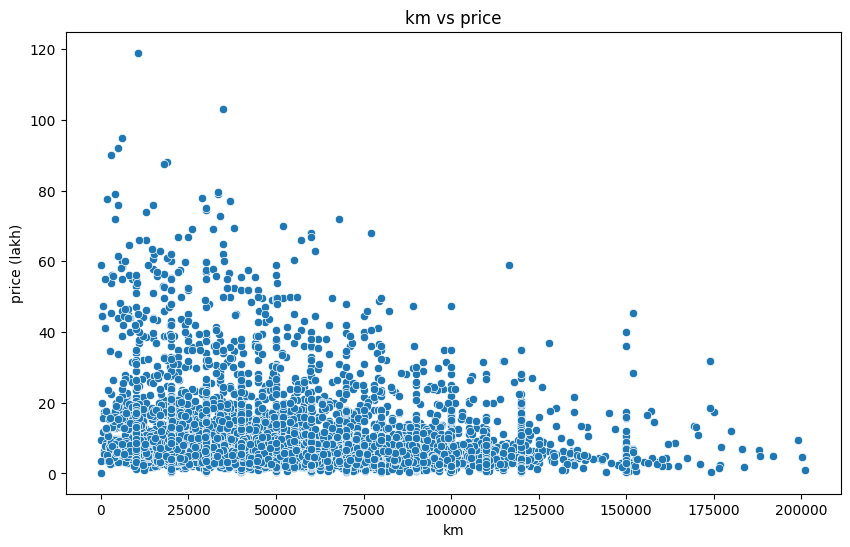

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

fig= plt.figure(figsize=(10,6))
sns.scatterplot(x='km', y='price (lakh)', data=df)
plt.title('km vs price')